In [1]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# loading the fashion mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [12]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [13]:
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


y = 2 Pullover


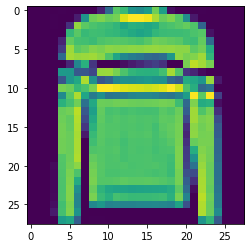

In [29]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [14]:
# normalizing the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [30]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [19]:
# Creating a sequential CNN model

model = tf.keras.Sequential()
"""
The methodology followed is going to be
initially we will perform a convolution, with relu activation and 'same' padding
after that max pooling will be performed
and later dropout
""" 

# Layer 1

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

In [20]:
# Layer 2

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

In [21]:
# Flattening the outputs

model.add(tf.keras.layers.Flatten())

In [22]:
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [23]:
# Taking a look at the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [25]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [33]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data = (x_valid, y_valid),
         callbacks = [checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.6236 - acc: 0.7692
Epoch 00001: val_loss improved from inf to 0.39778, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 107s 2ms/sample - loss: 0.6235 - acc: 0.7693 - val_loss: 0.3978 - val_acc: 0.8620
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.8397
Epoch 00002: val_loss improved from 0.39778 to 0.33858, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 105s 2ms/sample - loss: 0.4371 - acc: 0.8397 - val_loss: 0.3386 - val_acc: 0.8756
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3917 - acc: 0.8573
Epoch 00003: val_loss improved from 0.33858 to 0.31306, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 106s 2ms/sample - loss: 0.3916 - acc: 0.8573 - val_loss: 0.3131 - val_acc: 0.

In [34]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [35]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9059


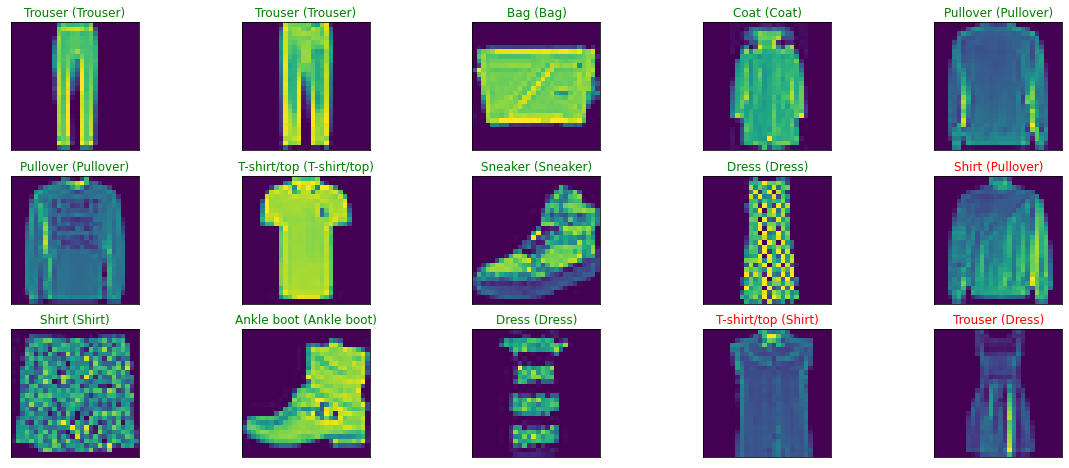

In [36]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))